# Final Project: Statistical Analysis of Student Performance

## Project Scenario

You are a teacher conducting a study on factors influencing student performance in exams. You have obtained the "Student Performance" dataset from Kaggle, which contains information about students' demographics and their scores in different subjects. Your task is to analyze the data, identify patterns, and draw conclusions about factors affecting student performance.

Dataset Link: [Student Performance Dataset](https://www.kaggle.com/spscientist/students-performance-in-exams)

## Instructions

You are required to perform the following analyses and answer the questions using the data provided.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
data = pd.read_csv('/Users/mahlagha/Desktop/Works in Progress/Data Science/Daneshkar/4- Statistics/Project/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Unnamed: 8,Unnamed: 9
0,female,group B,bachelor's degree,standard,none,72,72,74,NaN,NaN
1,female,group C,some college,standard,completed,69,90,88,NaN,NaN
2,female,group B,master's degree,standard,none,90,95,93,NaN,NaN
3,male,group A,associate's degree,free/reduced,none,47,57,44,NaN,NaN
4,male,group C,some college,standard,none,76,78,75,NaN,NaN


# 1. Basic Statistical Analysis
Calculate the mean and standard deviation for the math score, reading score, and writing score columns.

In [3]:
# Calculate mean
math_mean = np.mean (data['math score'])
reading_mean = np.mean (data['reading score'])
writing_mean = np.mean (data['writing score'])

# Calculate standard deviation
math_std = np.std (data['math score'])
reading_std = np.std (data['reading score'])
writing_std = np.std (data['writing score'])

print(f"Mean Math Score: {math_mean}, Std: {math_std}")
print(f"Mean Reading Score: {reading_mean}, Std: {reading_std}")
print(f"Mean Writing Score: {writing_mean}, Std: {writing_std}")

Mean Math Score: 66.089, Std: 15.155496659628165
Mean Reading Score: 69.169, Std: 14.59289001534652
Mean Writing Score: 68.054, Std: 15.188057281956759


# 2. Probabilities

Calculate the probability that a student is Male or has a Math_Score above 80.

In [4]:
# Calculate probabilities
num_of_males = np.sum(data['gender'] == 'male') 
p_male = num_of_males / 1000
print("Male: ", p_male)

students_math_above_80 = np.sum(data['math score'] > 80)  
p_math_above_80 = students_math_above_80 / 1000
print("Math: ", p_math_above_80)

num_male_or_math_80 = np.sum((data['gender'] == 'male') | (data['math score'] > 80)) 
p_male_or_math_above_80 = num_male_or_math_80 / 1000
print("Male or Math: ", p_male_or_math_above_80)

# Union probability
p_union = p_male + p_math_above_80
print(f"Probability of Male or Math Score > 80: {p_union}")

Male:  0.482
Math:  0.176
Male or Math:  0.55
Probability of Male or Math Score > 80: 0.6579999999999999


Calculate the probability that a student is Male and has a Math_Score above 80.

In [5]:
# Calculate probabilities
p_male = num_of_males / 1000
print("Male: ", p_male)

p_math_above_80 = students_math_above_80 / 1000
print("Math: ", p_math_above_80)

num_male_and_math_80 = np.sum((data['gender'] == 'male') & (data['math score'] > 80)) 
p_male_and_math_above_80 = num_male_and_math_80 / 1000
print("Male or Math: ", p_male_and_math_above_80)

# Union probability
p_intersection = p_male * p_math_above_80
print(f"Probability of Male and Math Score > 80: {p_intersection}")

Male:  0.482
Math:  0.176
Male or Math:  0.108
Probability of Male and Math Score > 80: 0.08483199999999999


### Bayes' Theorem
Calculate the probability that a student is Male given they have a Math_Score above 80.

In [6]:
# Calculate conditional probability using Bayes' theorem
A = p_male 
B = p_math_above_80 

# P(A|B)
p_male_given_math_above_80 = ((p_intersection/A) * A) / B
print(f"Probability of Male given Math Score > 80: {p_male_given_math_above_80}")

Probability of Male given Math Score > 80: 0.482


# 3. Normal Distribution
Check Normality
Use QQ plot, histogram, and Shapiro-Wilk test to check if Math_Score is normally distributed.

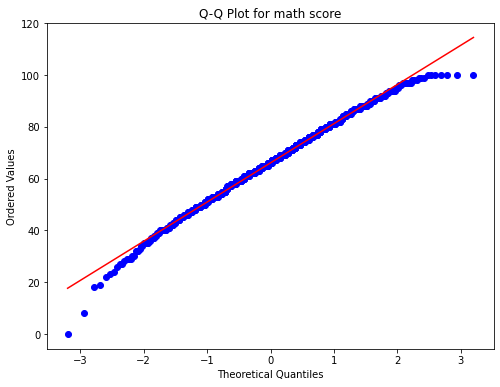

In [7]:
# QQ plot

plt.figure(figsize=(8, 6))
stats.probplot(data['math score'], dist="norm", plot=plt)
plt.title('Q-Q Plot for math score')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

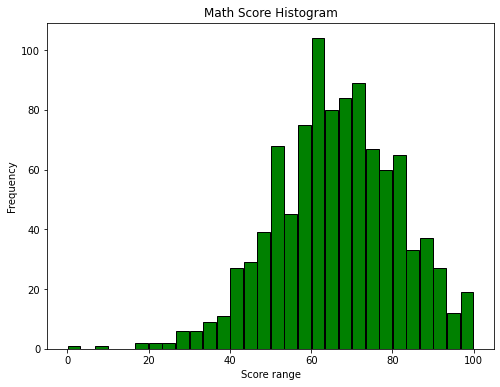

In [20]:
# Histogram
plt.figure(figsize=(8, 6))
plt.hist(data['math score'], bins=30, rwidth=0.95, color='g',edgecolor='k')
plt.title('Math Score Histogram')
plt.xlabel('Score range')
plt.ylabel('Frequency')
plt.show()

In [18]:
# Shapiro-Wilk test
from scipy.stats import shapiro
statistic, p_value = shapiro(data['math score'])
print(f"Shapiro-Wilk Test for Math Score: Statistic = {statistic}, p-value = {p_value}")

print(f"T-statistic: {statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print( "Math_Score is not normally distributed." )
else:
    print( "Therefore, Math_Score is normally distributed.")
        

Shapiro-Wilk Test for Math Score: Statistic = 0.9931484460830688, p-value = 0.000144858262501657
T-statistic: 0.9931484460830688, p-value: 0.000144858262501657
Math_Score is not normally distributed.


# 4. Z-Score and Noise Removal

Calculate the z-scores for the Math_Score column and remove noise (more than 95%).


In [10]:
# Calculate z-scores
data['Math_Score_z'] = (data['math score'] - math_mean) / math_std

# Remove noise
threshold = 2.5 
cleaned_data = data[np.abs(data['Math_Score_z']) <= threshold]

print(f"Original data size: {data.shape}")
print(f"Cleaned data size: {cleaned_data.shape}")

Original data size: (1000, 11)
Cleaned data size: (989, 11)


# 5. Visualizations
Generate different plots (box, histogram, scatter, pie) to visualize Math Score column before and after removing noise.

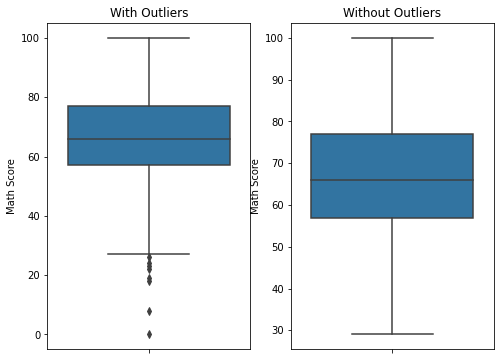

In [21]:
# Box plot
MIN = np.min(cleaned_data ['math score'])
Q1 = np.quantile (cleaned_data ['math score'], 0.25)
Q2 = np.quantile (cleaned_data ['math score'], 0.5)
Q3 = np.quantile (cleaned_data ['math score'], 0.75)
MAX = np.max(cleaned_data ['math score'])

plt.figure(figsize=(8, 6))
plt.subplot(121)
sns.boxplot(y=data ['math score'])
plt.title('With Outliers')
plt.ylabel ('Math Score')

plt.subplot(122)
sns.boxplot(y=cleaned_data ['math score'])
plt.title('Without Outliers')
plt.ylabel ('Math Score')

plt.show()

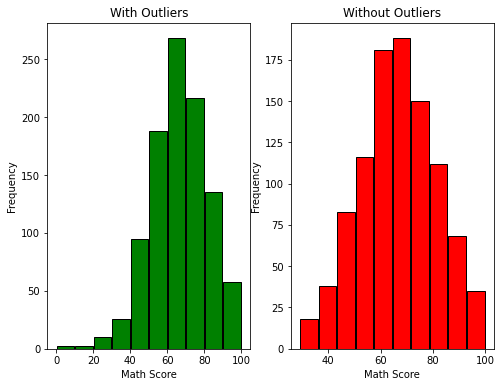

In [22]:
# Histogram
plt.figure(figsize=(8, 6))
plt.subplot(121)
plt.hist(data ['math score'], color= 'g', rwidth = 0.95, edgecolor='k')
plt.title('With Outliers')
plt.xlabel ('Math Score')
plt.ylabel ('Frequency')

plt.subplot(122)
plt.hist(cleaned_data ['math score'], color= 'r', rwidth = 0.95, edgecolor='k')
plt.title('Without Outliers')
plt.xlabel ('Math Score')
plt.ylabel ('Frequency')
plt.show()

<Figure size 720x864 with 0 Axes>

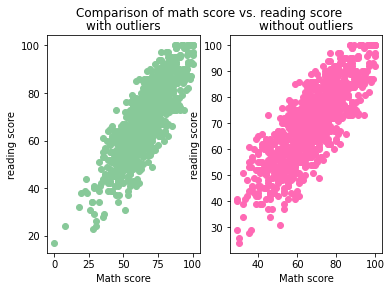

<Figure size 720x864 with 0 Axes>

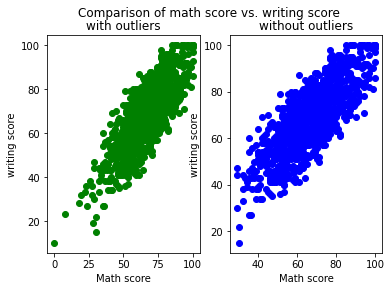

In [13]:
# Scatter Plot
# Math score vs. Reading Score
fig = plt.figure(figsize = (10, 12))
fig, (ax1, ax2) = plt.subplots(1,2)
# with Outliers
ax1.scatter(data['math score'], data['reading score'], color='#88c999')
ax1.set_title ('with outliers')
ax1.set_xlabel ('Math score')
ax1.set_ylabel ('reading score')

# without outliers
ax2.scatter(cleaned_data['math score'], cleaned_data['reading score'], color='hotpink')
ax2.set_title ('without outliers')
ax2.set_xlabel ('Math score')
ax2.set_ylabel ('reading score')
plt.suptitle('Comparison of math score vs. reading score')

# Math score vs. Writing Score
fig = plt.figure(figsize = (10, 12))
fig, (ax1, ax2) = plt.subplots(1,2)

# with Outliers
ax1.scatter(data['math score'], data['writing score'], color='green')
ax1.set_title ('with outliers')
ax1.set_xlabel ('Math score')
ax1.set_ylabel ('writing score')

# without outliers
ax2.scatter(cleaned_data['math score'], cleaned_data['writing score'], color='blue')
ax2.set_title ('without outliers')
ax2.set_xlabel ('Math score')
ax2.set_ylabel ('writing score')
plt.suptitle('Comparison of math score vs. writing score')

plt.show()

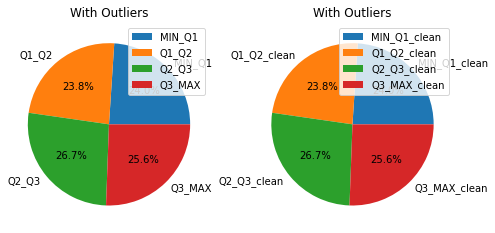

In [14]:
# Pie chart
# With Outliers
plt.figure(figsize=(8, 6))
plt.subplot(121)
MIN_Q1 = data[(data['math score'] >= MIN) & (data['math score'] < Q1)]['math score']
Q1_Q2 = data[(data['math score'] >= Q1) & (data['math score'] < Q2)]['math score']
Q2_Q3 = data[(data['math score'] >= Q2) & (data['math score'] < Q3)]['math score']
Q3_MAX = data[(data['math score'] >= Q3) & (data['math score'] <= MAX)]['math score']
Math_data = [MIN_Q1.count(), Q1_Q2.count(), Q2_Q3.count(), Q3_MAX.count()]
labels1 = ['MIN_Q1', 'Q1_Q2', 'Q2_Q3', 'Q3_MAX']
plt.pie (Math_data, labels= labels1, autopct='%1.1f%%')
plt.legend (labels1)
plt.title ('With Outliers')


# Without Outliers
plt.subplot(122)
MIN_Q1_clean = cleaned_data[(cleaned_data['math score'] >= MIN) & (cleaned_data['math score'] < Q1)]['math score']
Q1_Q2_clean = cleaned_data[(cleaned_data['math score'] >= Q1) & (cleaned_data['math score'] < Q2)]['math score']
Q2_Q3_clean = cleaned_data[(cleaned_data['math score'] >= Q2) & (cleaned_data['math score'] < Q3)]['math score']
Q3_MAX_clean = cleaned_data[(cleaned_data['math score'] >= Q3) & (cleaned_data['math score'] <= MAX)]['math score']
Math_data_clean = [MIN_Q1_clean.count(), Q1_Q2_clean.count(), Q2_Q3_clean.count(), Q3_MAX_clean.count()]
labels2 = ['MIN_Q1_clean', 'Q1_Q2_clean', 'Q2_Q3_clean', 'Q3_MAX_clean']
plt.pie (Math_data_clean, labels= labels2, autopct='%1.1f%%')
plt.legend (labels2)
plt.title ('With Outliers')

plt.show()

# 6. Parametric Hypothesis Testing

### Two samples
Perform a two-sample hypothesis test to compare the Math_Score between Male and Female students. (use cleaned data and choose  appropriate test)

In [15]:
from scipy.stats import ttest_ind

male_math_score = cleaned_data[cleaned_data['gender'] == 'male']['math score']
female_math_score = cleaned_data[cleaned_data['gender'] == 'female']['math score']


t_statistic, p_value = ttest_ind (male_math_score, female_math_score)
print(f"T-statistic: {t_statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print( "Reject the null hypothesis. There is a significant difference in mean between male_math_score and female_math_score.")
else:
    print( "Fail to reject the null hypothesis. There is no significant difference in mean  between between male_math_score and female_math_score and Virginica species.")
    

T-statistic: 4.928608672661751, p-value: 9.709150258320668e-07
Reject the null hypothesis. There is a significant difference in mean between male_math_score and female_math_score.


### 3 Samples or More
Perform an hypothesis test to compare the Math_Score across different ethnicities.

In [16]:
from scipy.stats import f_oneway
A = cleaned_data[cleaned_data['race/ethnicity'] == 'group A']['math score']
B = cleaned_data[cleaned_data['race/ethnicity'] == 'group B']['math score']
C = cleaned_data[cleaned_data['race/ethnicity'] == 'group C']['math score']


f_statistic, p_value = f_oneway (A, B, C)
print(f"f-statistic: {f_statistic}, p-value: {p_value}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print( "Reject the null hypothesis. There is a significant difference in mean between A, B and C ethnicity." )
else:
    print( "Fail to reject the null hypothesis. There is no significant difference in mean between A, B and C ethnicity")



f-statistic: 1.5350108949255465, p-value: 0.21631838224009226
Fail to reject the null hypothesis. There is no significant difference in mean between A, B and C ethnicity


# 7. Confidence Interval

Calculate a 95% confidence interval for the mean Math_Score.

In [17]:
cleaned_mean = np.mean (cleaned_data['math score'])
cleaned_std = np.std (cleaned_data['math score'])
n = len(cleaned_data['math score'])
confidence_level = 0.95
z_score = 1.96 #from standard normal distribution tables
margin = z_score * (cleaned_std / np.sqrt(n))
confidence_interval = (cleaned_mean - margin , cleaned_mean + margin)

print(f"95% Confidence interval for mean Math Score: {confidence_interval}")

95% Confidence interval for mean Math Score: (65.70126198870284, 67.49792911342053)
